# GRIP - THE SPARK FOUNDATION

### Data Science and Business Analytics Internship

Linear Regression with Scikit Python - Predicition using Supervised ML

#### TASK-1 : Predict the percentage of an student based on the no. of study hours.

In this task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.This is a simple linear regression task as it involves just 2 variables.

##### Author - Vijaya Lakshmi Basireddy

#### importing the Libraries

In [1]:
#importing the required libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
print("required libraries are imported successfully")

required libraries are imported successfully


#### importing the data from online source

In [2]:
#reading the data
url='http://bit.ly/w-data'
data = pd.read_csv(url)
print("data is imported successfully")

data is imported successfully


#### Data Exploration

In [3]:
#print the given data
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
#printing the head part of the given data
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
#printing the tail part of the given data
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [6]:
#to get no of rows and columns
data.shape  

(25, 2)

In [7]:
#describing the given data
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
#to get the type of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
#Checking for the missing or null values in dataset
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [10]:
#Checking the correlation between Hours and Scores
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


This shows the highest correlation between the Hours and Scores

#### Data Visualization

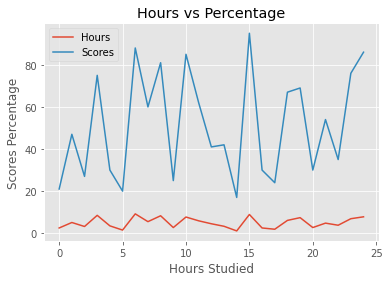

In [11]:
#Visualizing the data with line plot
plt.style.use("ggplot")
data.plot(kind="line")
plt.title("Hours vs Percentage")
plt.xlabel("Hours Studied")
plt.ylabel("Scores Percentage")
plt.show()

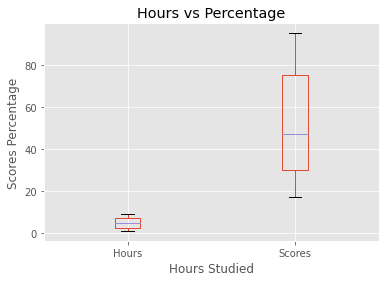

In [12]:
#Visualizing the data with box plot
plt.style.use("ggplot")
data.plot(kind="box")
plt.title("Hours vs Percentage")
plt.xlabel("Hours Studied")
plt.ylabel("Scores Percentage")
plt.show()

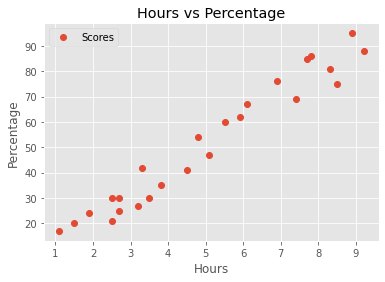

In [13]:
#visualizing the data with scatter plot
data.plot(x="Hours",y="Scores",style="o")
plt.title("Hours vs Percentage")
plt.xlabel("Hours")
plt.ylabel("Percentage")
plt.show()

#### Modeling the data

In [14]:
#Divide the data into attributes and labels
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

In [15]:
#Splitting the data into training and test set
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)

In [16]:
#training the Algorithm
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

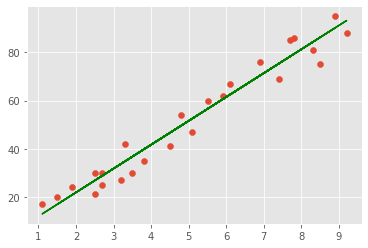

In [17]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_   
plt.scatter(X, y)
plt.plot(X, line,color="green");
plt.show()

#### Predictions

In [18]:
print(X_test)
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


#### Comparing Actual vs Predicted

In [19]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


##### What will be predicted score if a student studies for 9.25 hrs/ day?

In [20]:
hours = [[9.25]]
own_pred = regressor.predict(hours)
print("If a student studies for 9.25 hour per day then the predicted score is {}".format(own_pred[0]))

If a student studies for 9.25 hour per day then the predicted score is 93.69173248737538


#### Evalution of model

In [21]:
#using metrices to find mean absolute error and r2 to see the accuracy

from sklearn import metrics
from sklearn.metrics import r2_score

y_pred=regressor.predict(X_test)
print("Mean absolute error : ",format(metrics.mean_absolute_error(y_pred,y_test)))
print("R2-score : %.2f" % r2_score(y_pred,y_test))

Mean absolute error :  4.183859899002975
R2-score : 0.95


Mean Absolute Error(MAE) is the sum of absolute differences between our target and predicted variables. So it measures the average magnitude of errors in a set of predictions, without considering their directions.
R2-score : R2 is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression. 
Approxiamtley r2-score=1 mean this indicates perfect fit.